<a href="https://colab.research.google.com/github/sathasivamn/CLUSTERING-ANALYSIS/blob/main/Assignment_8_CLUSTERING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING ANALYSIS

## Steps:
### 1. Data Preprocessing
### 2. Exploratory Data Analysis (EDA)
### 3. Implementing Clustering Algorithms
### 4. Cluster Analysis and Interpretation
### 5. Visualization
### 6. Evaluation and Performance Metrics

## 1. Data Preprocessing

### a. Handle missing values.
### b. Remove outliers using IQR.
### c. Scale the features using StandardScaler.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [18]:
# Load the dataset
file_path = "/content/EastWestAirlines.xlsx"
df = pd.read_excel(file_path, sheet_name="data")

In [19]:
# Display dataset info and check for missing values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None

Missing Values:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
F

In [20]:
# Drop irrelevant columns if present (e.g., ID column)
df.drop(columns=["ID"], inplace=True, errors="ignore")

In [21]:
# Handle missing values by filling with median
df.fillna(df.median(), inplace=True)

In [22]:
# Handling Outliers using IQR

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [23]:
# Remove outliers from the dataset
df = remove_outliers(df)

In [26]:
# Scale the features

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## 2. Exploratory Data Analysis (EDA)

### a. Correlation heatmap and pairwise relationship plots.

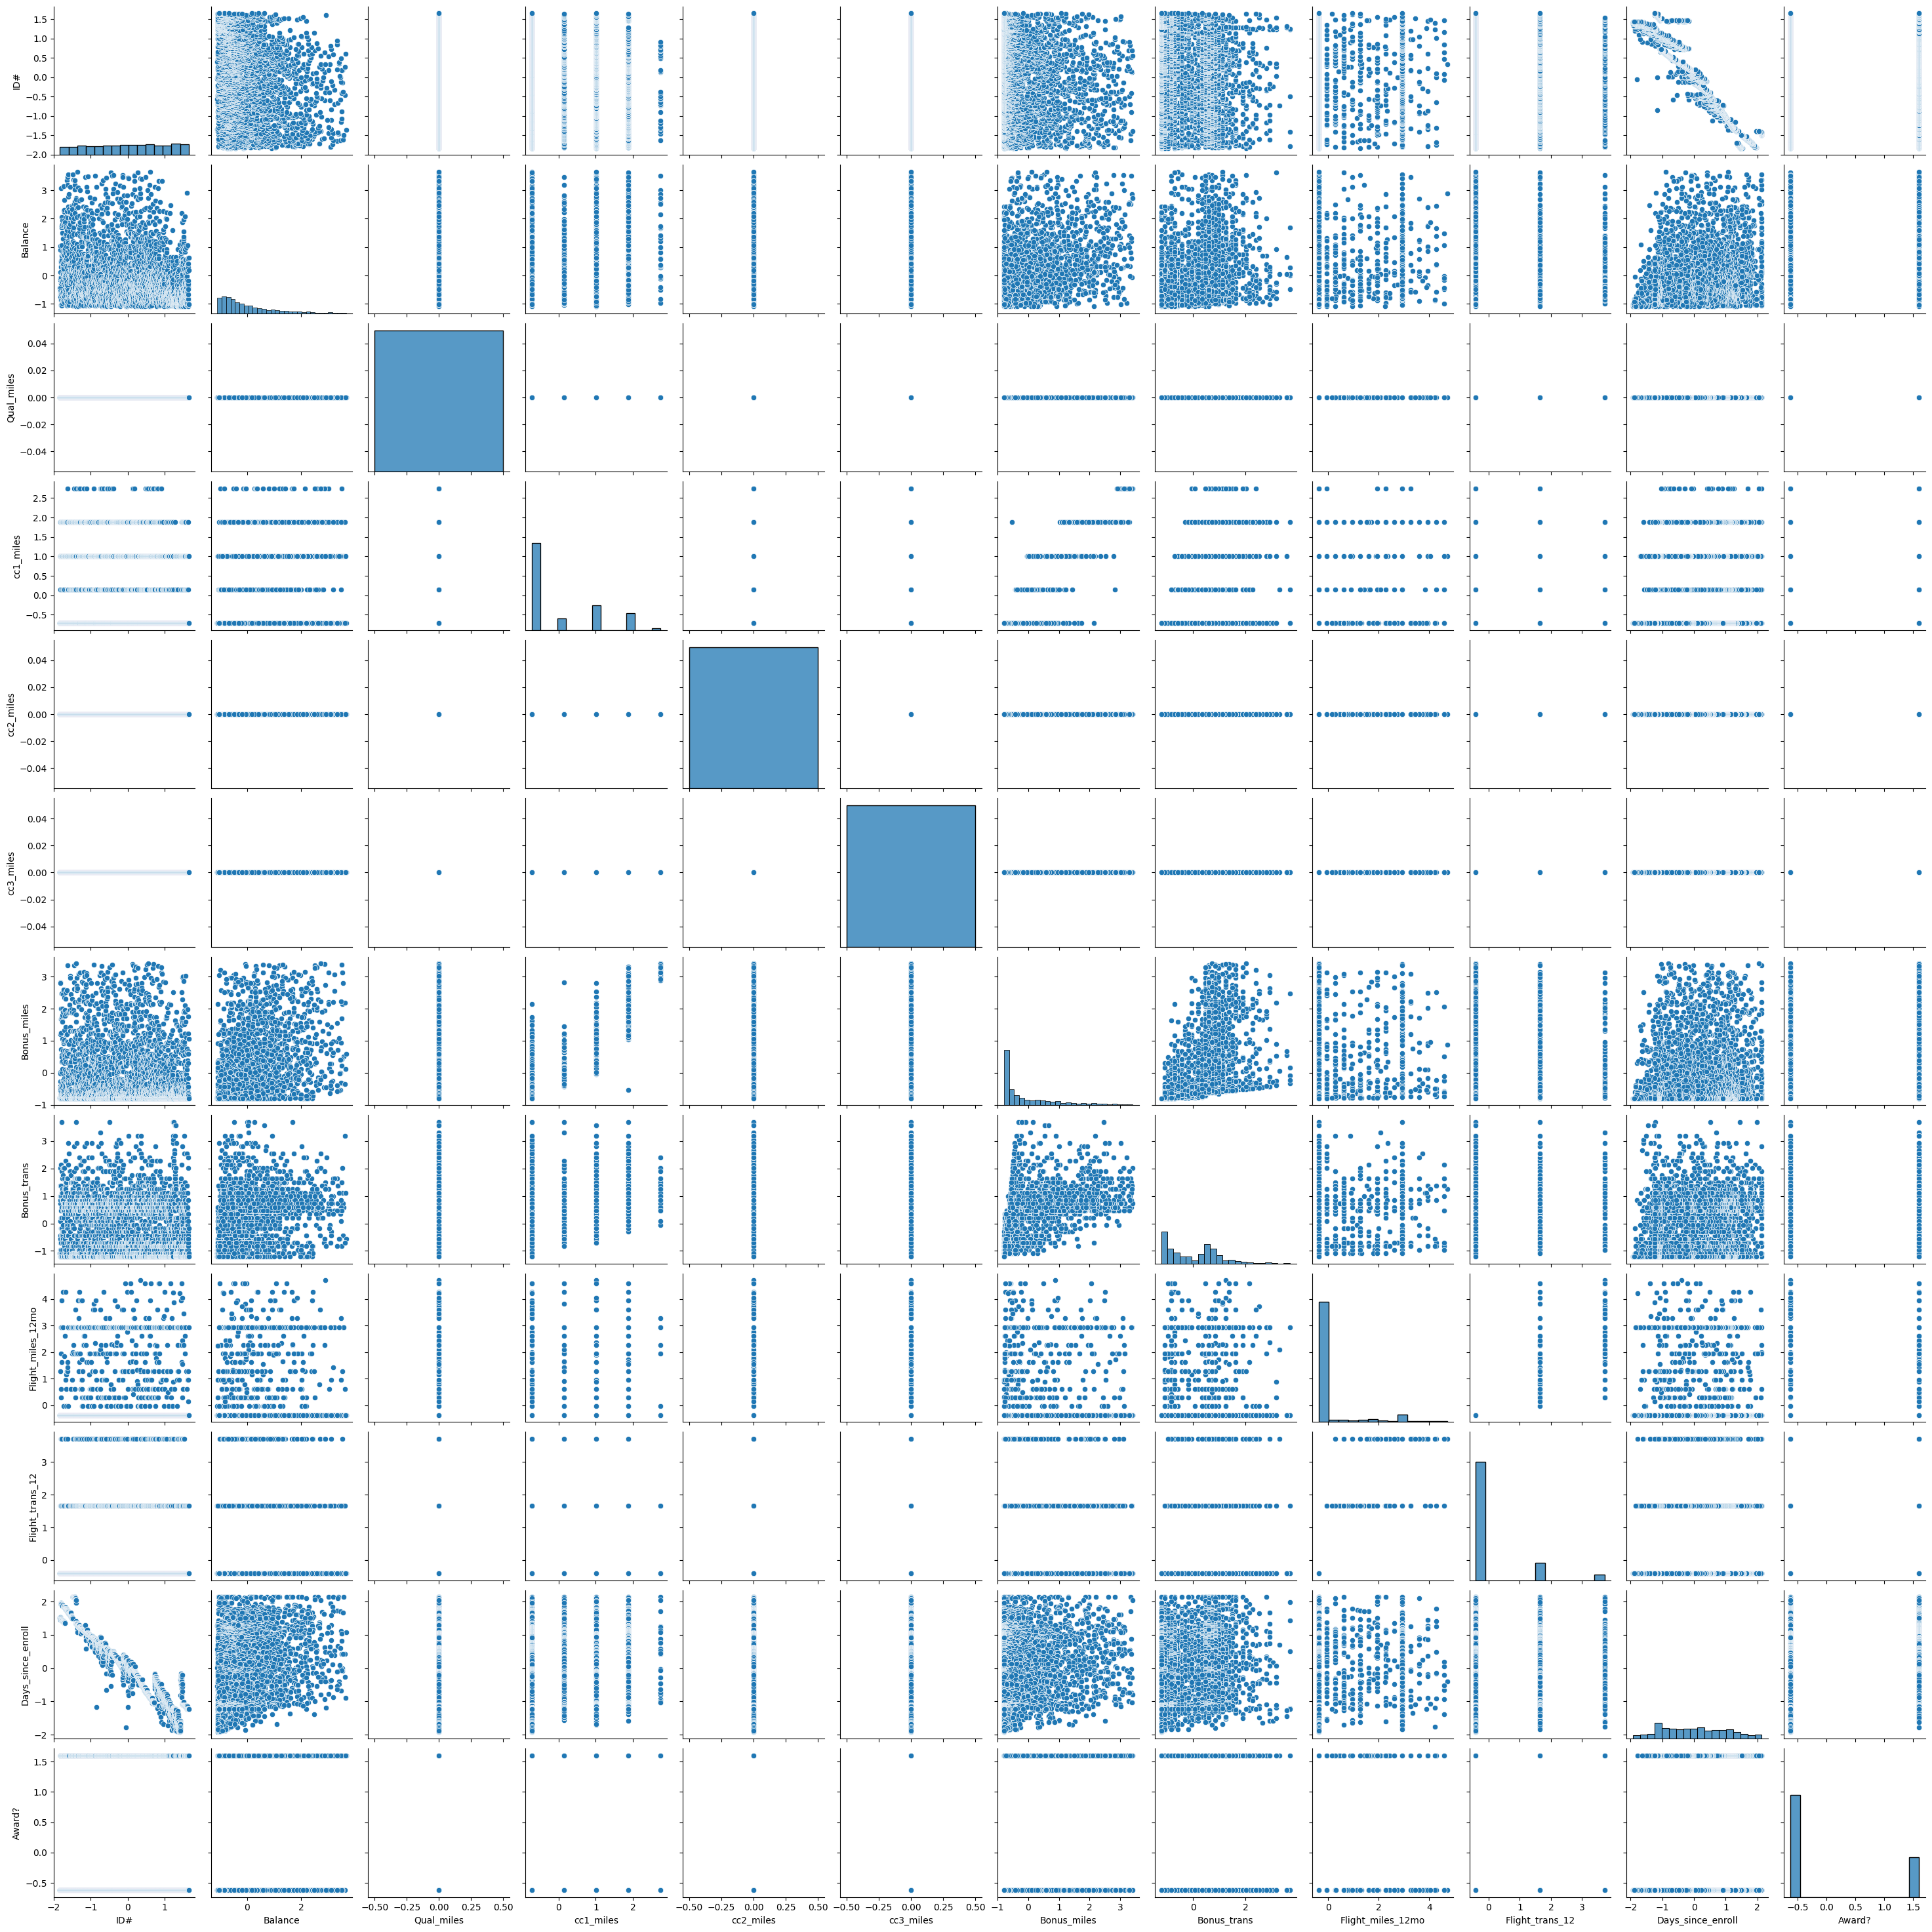

In [27]:
# EDA and Visualizations

# Pairplot to visualize relationships
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

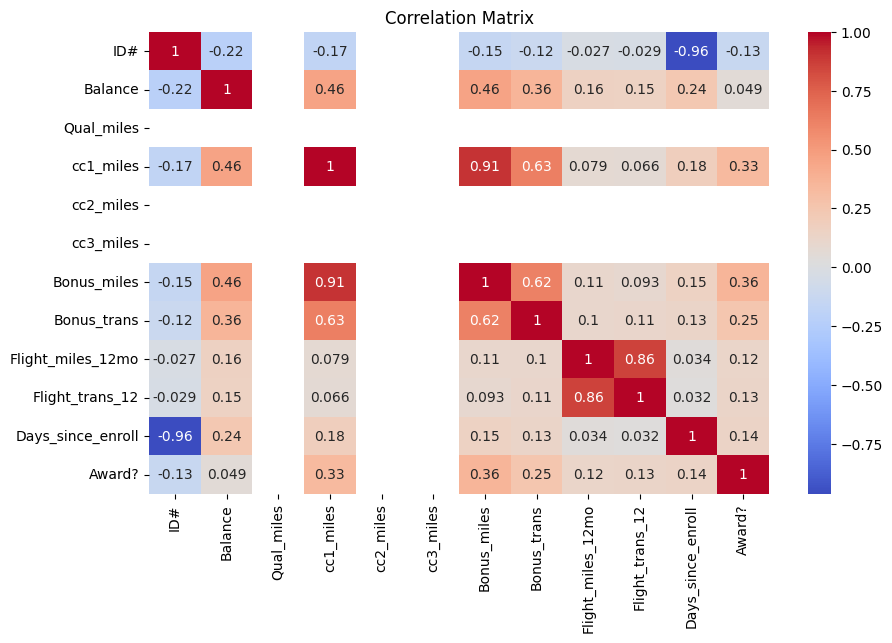

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(df_scaled, columns=df.columns).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 3. Implementing Clustering Algorithms
### a. K-Means: Determines optimal K using Elbow curve and evaluates clusters.
### b. Hierarchical Clustering: Uses Ward linkage and visualizes dendrogram.
### c. DBSCAN: Applies density-based clustering with tuned parameters.

In [29]:
# K-Means Clustering

# Elbow Method to determine optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

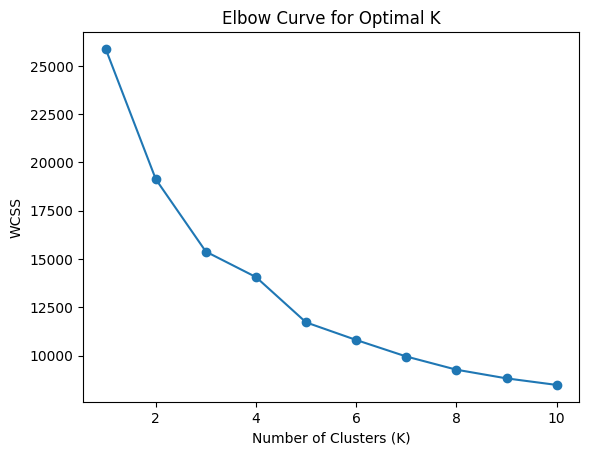

In [30]:
# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Curve for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [31]:
# Apply K-Means with optimal K (assume K=3 from Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df["KMeans_Cluster"] = kmeans_labels

In [32]:
# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.3083


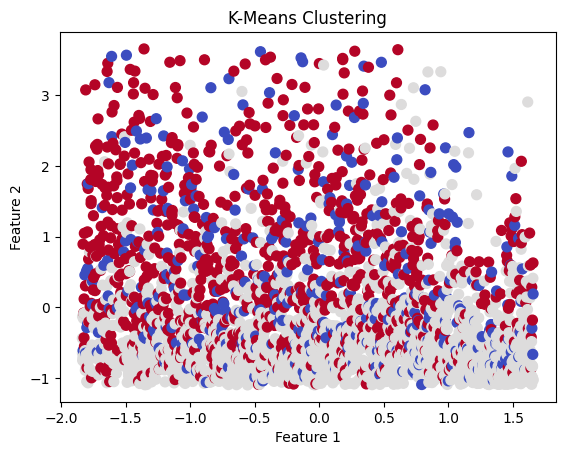

In [33]:
# Visualize K-Means clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap="coolwarm", s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

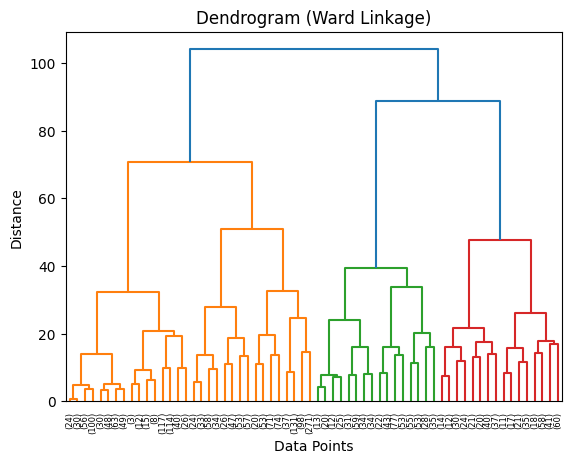

In [37]:
# Hierarchical Clustering

# Apply hierarchical clustering with Ward linkage
linkage_matrix = linkage(df_scaled, method="ward")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Assign clusters based on distance threshold
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion="maxclust")
df["Hierarchical_Cluster"] = hierarchical_labels

In [38]:
# DBSCAN Clustering
# Apply DBSCAN with optimal parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df["DBSCAN_Cluster"] = dbscan_labels

In [39]:
# Silhouette score for DBSCAN (if valid)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN produced only one cluster, silhouette score not applicable.")

DBSCAN Silhouette Score: 0.2002


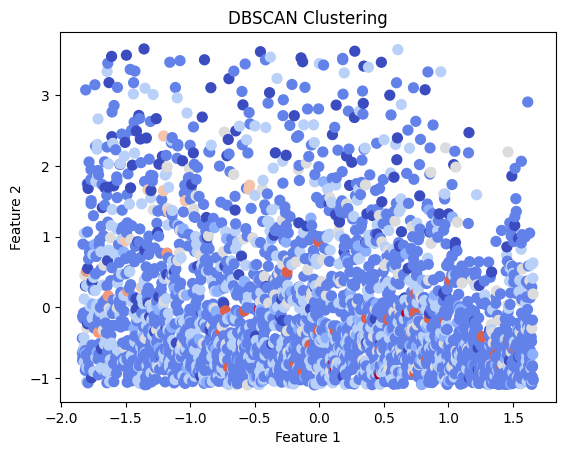

In [40]:
# Visualize DBSCAN clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap="coolwarm", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 4. Cluster Analysis:

### a. Analyzes characteristics of clusters using groupby().mean().

In [41]:
# Cluster Analysis and Interpretation

# Analyze characteristics of clusters
print("\nK-Means Cluster Analysis:")
print(df.groupby("KMeans_Cluster").mean())


K-Means Cluster Analysis:
                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2030.144044  65191.260388         0.0   2.047091        1.0   
1               2350.516423  28555.939781         0.0   1.086375        1.0   
2               1701.248276  73776.834483         0.0   3.144828        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  14282.160665    11.725762         421.842105   
1                     1.0   2764.661800     5.359489           4.026156   
2                     1.0  24780.127586    16.022989           5.995402   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      1.301939        4100.620499  0.443213   
1        

In [42]:
# Analyze characteristics of clusters
print("\nHierarchical Cluster Analysis:")
print(df.groupby("Hierarchical_Cluster").mean())


Hierarchical Cluster Analysis:
                              ID#       Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                     
1                     2178.786498  32554.568057         0.0   1.240395   
2                     1988.700337  79039.067340         0.0   3.466330   
3                     2017.821351  61878.490196         0.0   2.052288   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
1                           1.0        1.0   4231.213502     6.747530   
2                           1.0        1.0  28543.095960    16.003367   
3                           1.0        1.0  14369.945534    11.294118   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                                                          
1                              0.137212         0.001647        3796.3830

In [43]:
# Analyze characteristics of clusters
print("\nDBSCAN Cluster Analysis:")
print(df.groupby("DBSCAN_Cluster").mean())


DBSCAN Cluster Analysis:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
-1              1749.777027   98067.918919         0.0   2.500000        1.0   
 0              2224.034368   42728.592018         0.0   1.568182        1.0   
 1              2020.417391   38917.043478         0.0   2.417391        1.0   
 2              1872.196995   46174.258765         0.0   2.439065        1.0   
 3              2205.092593   53196.006173         0.0   1.518519        1.0   
 4               846.888889  109408.333333         0.0   4.222222        1.0   
 5               315.600000   58069.200000         0.0   1.200000        1.0   
 6              2651.571429   33013.214286         0.0   1.000000        1.0   
 7              2325.800000   23687.800000         0.0   1.000000        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster    

## 5. Cluster Visualizations:
### a. Scatter plots to visualize clusters formed by each algorithm.

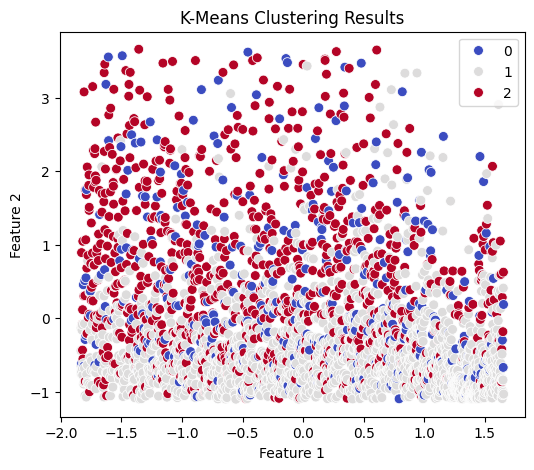

In [44]:
# Visualizing Cluster Separation

# K-Means Cluster Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=kmeans_labels, palette="coolwarm", s=50)
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

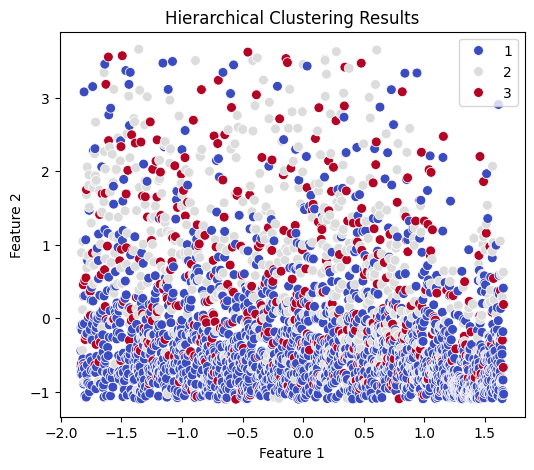

In [45]:
# Hierarchical Cluster Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=hierarchical_labels, palette="coolwarm", s=50)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

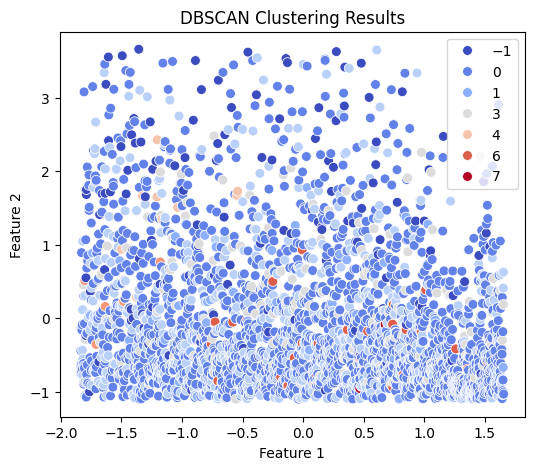

In [46]:
# DBSCAN Cluster Visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=dbscan_labels, palette="coolwarm", s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 6. Evaluation and Performance:
### a. Silhouette scores for K-Means and DBSCAN.

In [47]:
# Final Cluster Insights

print("\nInsights Based on Cluster Analysis:")
for cluster in df["KMeans_Cluster"].unique():
    print(f"\nCluster {cluster} (K-Means) shows:")
    print(df[df["KMeans_Cluster"] == cluster].mean().sort_values(ascending=False).head(3))


Insights Based on Cluster Analysis:

Cluster 1 (K-Means) shows:
Balance              28555.939781
Days_since_enroll     3483.546229
Bonus_miles           2764.661800
dtype: float64

Cluster 2 (K-Means) shows:
Balance              73776.834483
Bonus_miles          24780.127586
Days_since_enroll     4692.798851
dtype: float64

Cluster 0 (K-Means) shows:
Balance              65191.260388
Bonus_miles          14282.160665
Days_since_enroll     4100.620499
dtype: float64


# Cluster Insights and Analysis:

## K-Means provides clear and well-defined clusters, but may be sensitive to outliers.

## Hierarchical clustering visually explains possible cluster hierarchies.

## DBSCAN is useful for identifying noise and clusters with varying density but may generate only one cluster.

